<a href="https://colab.research.google.com/github/AIML-24/ADM_PROJECT/blob/main/ADM_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your age: 54
Enter your favourite singer: sunitha

🎯 Recommended Theme: Bonds
🔍 Closest Matches:
- Shiva | Age: 46 | Singer: S.P.Balasubramanyam | Theme: Bonds
- Srimatha | Age: 42 | Singer: S.P.Balasubramanyam | Theme: Bonds
- Iylaiah | Age: 72 | Singer: P.Susheela | Theme: Nature


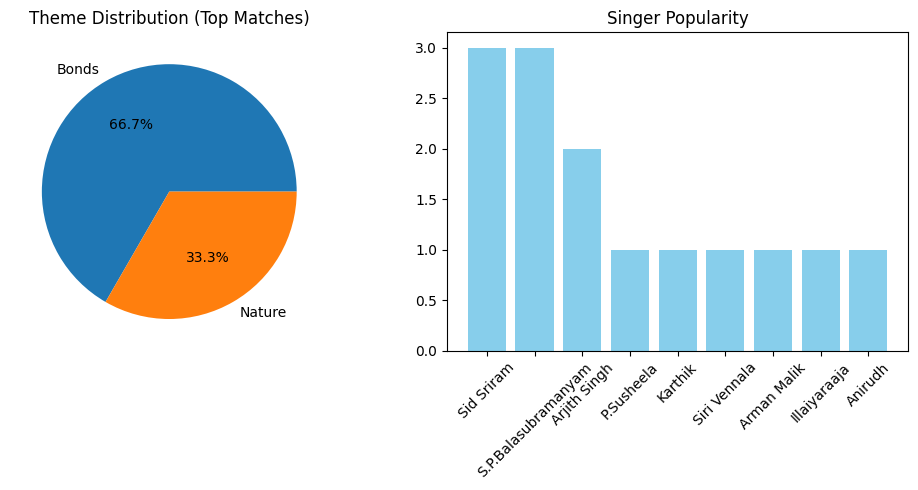

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Load and clean the data
def load_data(filename):
    df = pd.read_csv(filename)
    df.columns = [col.strip() for col in df.columns]  # Strip extra spaces
    return df

# Encode user into a vector
def encode_user(user, unique_singers):
    singer_vector = [1 if user["Favourite Singer"] == s else 0 for s in unique_singers]
    return [user["Age"]] + singer_vector

# Euclidean distance between two user vectors
def euclidean_distance(vec1, vec2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vec1, vec2)))

# K-NN logic
def recommend_theme(data, new_user, k=3):
    unique_singers = data["Favourite Singer"].unique().tolist()
    new_vec = encode_user(new_user, unique_singers)

    distances = []
    for _, row in data.iterrows():
        existing_vec = encode_user(row, unique_singers)
        dist = euclidean_distance(new_vec, existing_vec)
        distances.append((dist, row))

    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    # Count themes
    theme_counts = {}
    for _, neighbor in nearest_neighbors:
        theme = neighbor["Favourite Theme"]
        theme_counts[theme] = theme_counts.get(theme, 0) + 1

    recommended_theme = max(theme_counts, key=theme_counts.get)
    return recommended_theme, theme_counts, nearest_neighbors

# Plot charts
def plot_charts(data, theme_counts):
    # Pie chart of recommended themes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pie(theme_counts.values(), labels=theme_counts.keys(), autopct='%1.1f%%')
    plt.title("Theme Distribution (Top Matches)")

    # Bar chart of singer popularity
    plt.subplot(1, 2, 2)
    singer_counts = data["Favourite Singer"].value_counts()
    plt.bar(singer_counts.index, singer_counts.values, color='skyblue')
    plt.title("Singer Popularity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === Main Execution ===
filename = "Adm project.csv"
data = load_data(filename)

# Get user input
age = int(input("Enter your age: "))
singer = input("Enter your favourite singer: ").strip()

new_user = {"Age": age, "Favourite Singer": singer}
recommended_theme, theme_counts, nearest = recommend_theme(data, new_user)

# Output result
print(f"\n🎯 Recommended Theme: {recommended_theme}")
print("🔍 Closest Matches:")
for _, user in nearest:
    print(f"- {user['Name']} | Age: {user['Age']} | Singer: {user['Favourite Singer']} | Theme: {user['Favourite Theme']}")

# Show visual charts
plot_charts(data, theme_counts)